In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# import Keras Network lib
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, GRU

# import RMSE,MSE,MAPE lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../BNB-USD.csv')
df1=df.reset_index()['Close']
df1

0         1.990770
1         1.796840
2         1.670470
3         1.519690
4         1.686620
           ...    
2039    239.089081
2040    235.438797
2041    231.051437
2042    243.890533
2043    237.574265
Name: Close, Length: 2044, dtype: float64

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 7s 117ms/step - loss: 0.0292 - val_loss: 0.0045
Epoch 2/100
21/21 [==============================] - 2s 80ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 3/100
21/21 [==============================] - 2s 91ms/step - loss: 7.1622e-04 - val_loss: 6.6014e-04
Epoch 4/100
21/21 [==============================] - 2s 81ms/step - loss: 6.3680e-04 - val_loss: 6.9220e-04
Epoch 5/100
21/21 [==============================] - 2s 89ms/step - loss: 6.0217e-04 - val_loss: 7.3125e-04
Epoch 6/100
21/21 [==============================] - 2s 94ms/step - loss: 5.7222e-04 - val_loss: 6.8902e-04
Epoch 7/100
21/21 [==============================] - 2s 88ms/step - loss: 5.4148e-04 - val_loss: 7.6045e-04
Epoch 8/100
21/21 [==============================] - 2s 88ms/step - loss: 5.2111e-04 - val_loss: 5.6079e-04
Epoch 9/100
21/21 [==============================] - 2s 89ms/step - loss: 5.3039e-04 - val_loss: 5.4804e-04
Epoch 10/100
21/21 [=======================

Epoch 76/100
21/21 [==============================] - 3s 156ms/step - loss: 3.2466e-04 - val_loss: 3.9242e-04
Epoch 77/100
21/21 [==============================] - 3s 148ms/step - loss: 3.4506e-04 - val_loss: 3.6982e-04
Epoch 78/100
21/21 [==============================] - 3s 149ms/step - loss: 3.1693e-04 - val_loss: 3.4370e-04
Epoch 79/100
21/21 [==============================] - 3s 147ms/step - loss: 3.3997e-04 - val_loss: 4.1932e-04
Epoch 80/100
21/21 [==============================] - 4s 194ms/step - loss: 3.5389e-04 - val_loss: 3.7765e-04
Epoch 81/100
21/21 [==============================] - 3s 167ms/step - loss: 3.3857e-04 - val_loss: 4.1195e-04
Epoch 82/100
21/21 [==============================] - 3s 162ms/step - loss: 3.5853e-04 - val_loss: 4.0498e-04
Epoch 83/100
21/21 [==============================] - 3s 160ms/step - loss: 3.6256e-04 - val_loss: 3.8732e-04
Epoch 84/100
21/21 [==============================] - 4s 195ms/step - loss: 3.7038e-04 - val_loss: 4.0543e-04
Epoch 85/1

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

4/4 [==============================] - 0s 10ms/step


In [11]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE on test set: {:.3f}".format(mape))
mape = mean_absolute_percentage_error(yval, y_pred_val)
print("MAPE on validation set: {:.3f}".format(mape))
evs = explained_variance_score(ytest, y_pred)
print("The explained variance score (EVS) on test set: {:.3f}".format(evs))
evs = explained_variance_score(yval, y_pred_val)
print("The explained variance score (EVS) on validate set: {:.3f}".format(evs))

RMSE on test set: 0.020
RMSE on validation set: 0.015
MAPE on test set: 0.033
MAPE on validation set: 0.027
The explained variance score (EVS) on test set: 0.964
The explained variance score (EVS) on validate set: 0.885


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30 and len(temp_input) >= n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.42694237 0.42326871 0.40907224 0.40925538 0.41005909 0.42743496
 0.45596829 0.45664851 0.45331725 0.48704139 0.5007178  0.48950874
 0.49759857 0.49158345 0.49512294 0.47521485 0.487006   0.4759144
 0.47637974 0.48559834 0.45898966 0.46241829 0.4632803  0.46732347
 0.46802425 0.46532065 0.46340913 0.4554494  0.45905747 0.46360871
 0.4612228  0.45861938 0.45852332 0.46184223 0.47001046 0.47650613
 0.47086292 0.47975428 0.48602235 0.49230179 0.5142748  0.502072
 0.50681758 0.47643085 0.46928492 0.4748993  0.49020707 0.48816568
 0.48909578 0.49959705 0.48846671 0.48902045 0.47908999 0.47558124
 0.49858837 0.48535539 0.47531123 0.48163036 0.47822508 0.48270933
 0.47652949 0.47480446 0.46347232 0.46131039 0.46437155 0.45416405
 0.45550983 0.45919399 0.46074999 0.462817   0.45962882 0.46363891
 0.45677594 0.45604556 0.45864975 0.45240024 0.45646288 0.4627826
 0.45154891 0.44977025 0.45296331 0.4540097  0.46391558 0.46026242
 0.46008045 0.45293421 0.45009603 0.45376055 0.4527167

7 day output [[0.42451996]]
8 day input [0.45331725 0.48704139 0.5007178  0.48950874 0.49759857 0.49158345
 0.49512294 0.47521485 0.487006   0.4759144  0.47637974 0.48559834
 0.45898966 0.46241829 0.4632803  0.46732347 0.46802425 0.46532065
 0.46340913 0.4554494  0.45905747 0.46360871 0.4612228  0.45861938
 0.45852332 0.46184223 0.47001046 0.47650613 0.47086292 0.47975428
 0.48602235 0.49230179 0.5142748  0.502072   0.50681758 0.47643085
 0.46928492 0.4748993  0.49020707 0.48816568 0.48909578 0.49959705
 0.48846671 0.48902045 0.47908999 0.47558124 0.49858837 0.48535539
 0.47531123 0.48163036 0.47822508 0.48270933 0.47652949 0.47480446
 0.46347232 0.46131039 0.46437155 0.45416405 0.45550983 0.45919399
 0.46074999 0.462817   0.45962882 0.46363891 0.45677594 0.45604556
 0.45864975 0.45240024 0.45646288 0.4627826  0.45154891 0.44977025
 0.45296331 0.4540097  0.46391558 0.46026242 0.46008045 0.45293421
 0.45009603 0.45376055 0.45271679 0.45039792 0.40846874 0.41530129
 0.3825143  0.38660382

15 day output [[0.4985394]]
16 day input [0.487006   0.4759144  0.47637974 0.48559834 0.45898966 0.46241829
 0.4632803  0.46732347 0.46802425 0.46532065 0.46340913 0.4554494
 0.45905747 0.46360871 0.4612228  0.45861938 0.45852332 0.46184223
 0.47001046 0.47650613 0.47086292 0.47975428 0.48602235 0.49230179
 0.5142748  0.502072   0.50681758 0.47643085 0.46928492 0.4748993
 0.49020707 0.48816568 0.48909578 0.49959705 0.48846671 0.48902045
 0.47908999 0.47558124 0.49858837 0.48535539 0.47531123 0.48163036
 0.47822508 0.48270933 0.47652949 0.47480446 0.46347232 0.46131039
 0.46437155 0.45416405 0.45550983 0.45919399 0.46074999 0.462817
 0.45962882 0.46363891 0.45677594 0.45604556 0.45864975 0.45240024
 0.45646288 0.4627826  0.45154891 0.44977025 0.45296331 0.4540097
 0.46391558 0.46026242 0.46008045 0.45293421 0.45009603 0.45376055
 0.45271679 0.45039792 0.40846874 0.41530129 0.3825143  0.38660382
 0.38447914 0.35239985 0.3469854  0.34047764 0.35952183 0.35015293
 0.36318514 0.3705259  0.3

23 day output [[0.5658559]]
24 day input [0.46802425 0.46532065 0.46340913 0.4554494  0.45905747 0.46360871
 0.4612228  0.45861938 0.45852332 0.46184223 0.47001046 0.47650613
 0.47086292 0.47975428 0.48602235 0.49230179 0.5142748  0.502072
 0.50681758 0.47643085 0.46928492 0.4748993  0.49020707 0.48816568
 0.48909578 0.49959705 0.48846671 0.48902045 0.47908999 0.47558124
 0.49858837 0.48535539 0.47531123 0.48163036 0.47822508 0.48270933
 0.47652949 0.47480446 0.46347232 0.46131039 0.46437155 0.45416405
 0.45550983 0.45919399 0.46074999 0.462817   0.45962882 0.46363891
 0.45677594 0.45604556 0.45864975 0.45240024 0.45646288 0.4627826
 0.45154891 0.44977025 0.45296331 0.4540097  0.46391558 0.46026242
 0.46008045 0.45293421 0.45009603 0.45376055 0.45271679 0.45039792
 0.40846874 0.41530129 0.3825143  0.38660382 0.38447914 0.35239985
 0.3469854  0.34047764 0.35952183 0.35015293 0.36318514 0.3705259
 0.37898007 0.38784993 0.39687774 0.4060114  0.41523263 0.42451996
 0.43384942 0.44319725 0.

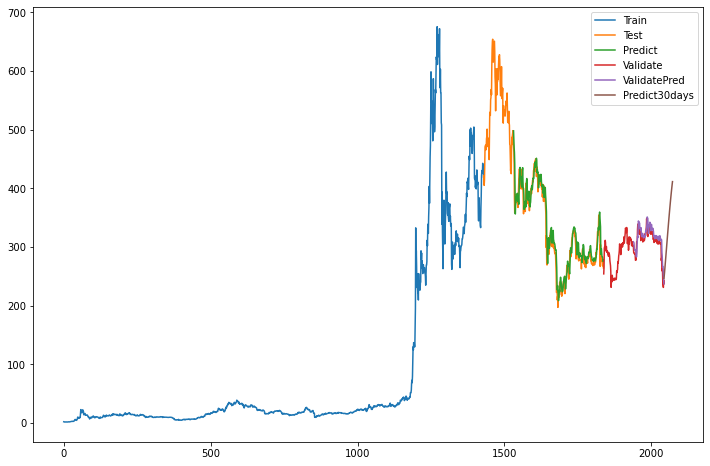

In [14]:
# 14.Vẽ hình

plt.subplots(figsize=(12, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

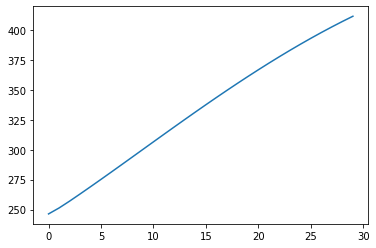

In [15]:
plt.plot(scaler.inverse_transform(lst_output))